In [212]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['kc_house_data.csv']


In [213]:
data = pd.read_csv('../input/kc_house_data.csv')

In [214]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [215]:
data.columns[data.isnull().any()]

Index([], dtype='object')

The Data is clean and there is no invalid values

In [216]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

EDA

1.Finding unique values for each feature

In [217]:
numeric_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
categorical_columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition','grade']

In [218]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [219]:
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [220]:
data['sqft_living'].unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425])

In [221]:
data['sqft_lot'].unique()

array([ 5650,  7242, 10000, ...,  5813,  2388,  1076])

In [222]:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [223]:
data['waterfront'].unique()

array([0, 1])

In [224]:
data['view'].unique()

array([0, 3, 4, 2, 1])

In [225]:
data['condition'].unique()

array([3, 5, 4, 1, 2])

In [226]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

In [227]:
data['sqft_above'].unique()

array([1180, 2170,  770, 1050, 1680, 3890, 1715, 1060, 1890, 1860,  860,
       1430, 1370, 1810, 1980, 1600, 1200, 1250, 2330, 2270, 1070, 2450,
       1710, 1750, 1400,  790, 2570, 2320, 1190, 1510, 1090, 1280,  930,
       2360,  890, 2620, 2600, 3595, 1570,  920, 3160,  990, 2290, 2165,
       1640, 1000, 2130, 2830, 2250, 2420, 3250, 1850, 1590, 1260, 2519,
       1540, 1110, 1770, 2720, 2240, 3070, 2380, 2390,  880, 1040,  910,
       3450, 2350, 1900, 1010,  960, 2660, 1610,  765, 3520, 1290, 1960,
       1160, 1210, 1270, 1440, 2190, 2920, 1460, 1170, 1240, 3140, 2030,
       2310,  700, 1080, 2520, 2780, 1560, 1450, 1720, 2910, 1620, 1360,
       2070, 2460, 1390, 2140, 1320, 1340, 1550,  940, 1380, 3670, 2370,
       1130,  980, 3540, 2500, 1760, 1030, 1780, 3400, 2680, 1670, 2590,
        820, 1220, 2440, 2090, 1100, 1330, 1420, 1690, 2150, 1910, 1350,
       1940,  900, 1630, 2714,  850, 1870, 1950, 2760, 2020, 1120, 1480,
       1230, 2280, 3760, 3530,  830, 1300, 2740, 18

In [228]:
data['sqft_basement'].unique()

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  380,  710,  840,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960, 1100,  280,  870,  460,
       1400, 1320,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,
        350,  935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,
        340,  470,  370,  140, 1760,  130,  610,  520,  890, 1110,  150,
       1720,  810,  190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,
        310,  930, 1390, 1830, 1300,  510, 1330, 1590,  920, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

In [229]:
data['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [230]:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [231]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

From the above analysis it seems the data contains valid values

2.Univariate Analysis of features

4.024069144684712

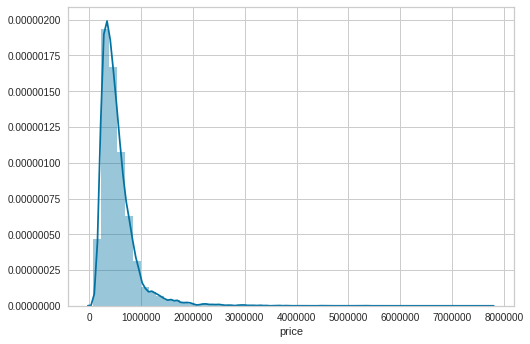

In [232]:
sns.distplot(data['price'])
data['price'].skew()

price-high positive skew

1.97429953543601

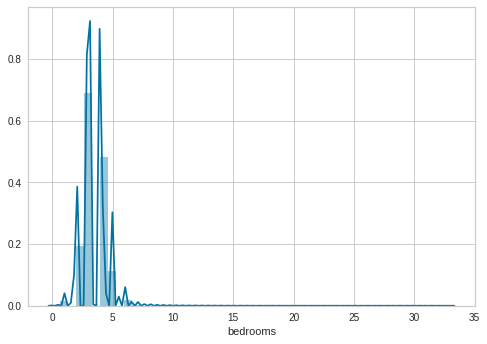

In [233]:
sns.distplot(data['bedrooms'])
data['bedrooms'].skew()

bedrooms-positiveskew

0.5111075733474171

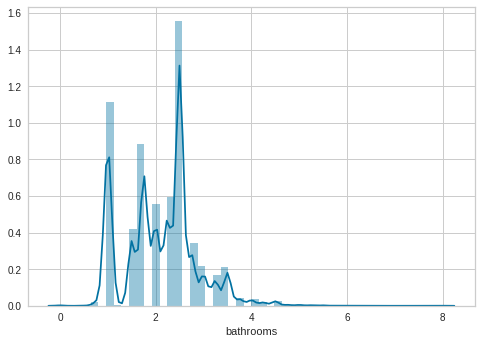

In [234]:
sns.distplot(data['bathrooms'])
data['bathrooms'].skew()

bathrooms-low skew

In [235]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

1.471555426802092

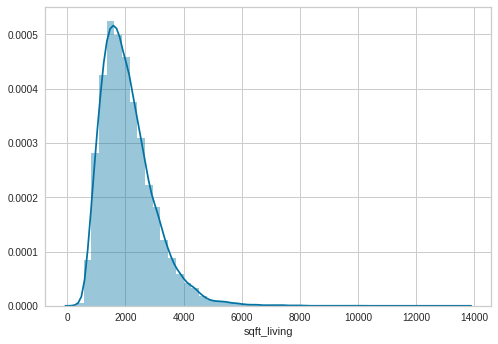

In [236]:
sns.distplot(data['sqft_living'])
data['sqft_living'].skew()

sqft living-positive skew

13.060018959031755

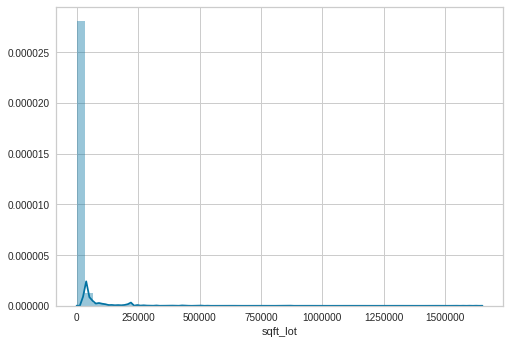

In [237]:
sns.distplot(data['sqft_lot'])
data['sqft_lot'].skew()

sqft lot-very high skew

0.616176721157611

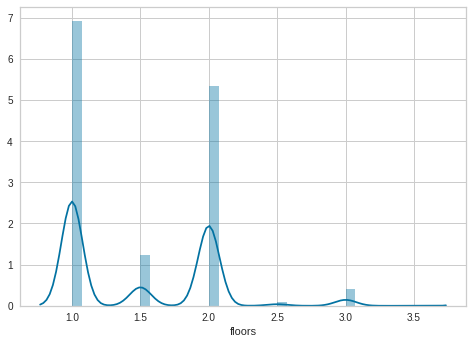

In [238]:
sns.distplot(data['floors'])
data['floors'].skew()

1 and 2 has high value in floors

11.385107942339081

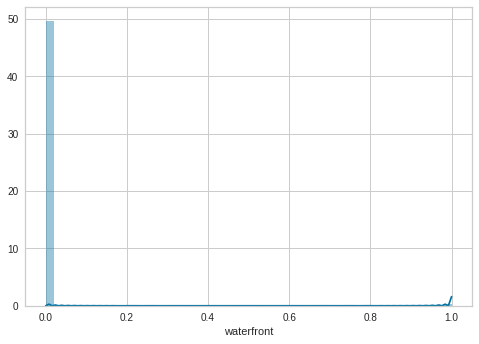

In [239]:
sns.distplot(data['waterfront'])
data['waterfront'].skew()

There are very few houses with water front

3.395749593248714

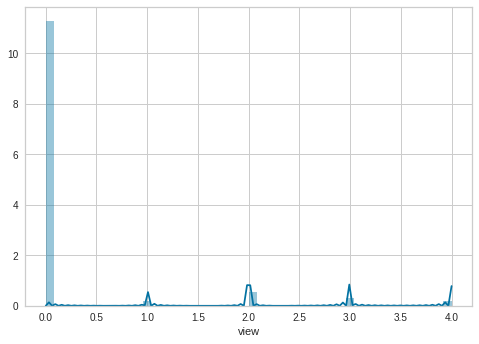

In [240]:
sns.distplot(data['view'])
data['view'].skew()

There are few houses with viewspot

1.0328046374434587

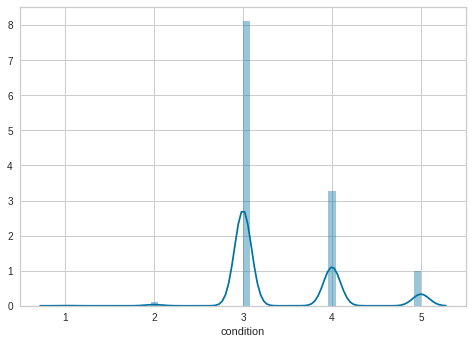

In [241]:
sns.distplot(data['condition'])
data['condition'].skew()

Condition 3 houses are more

0.7711032007576067

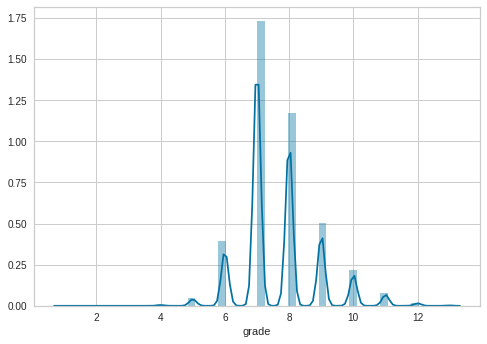

In [242]:
sns.distplot(data['grade'])
data['grade'].skew()

grade 7 houses are more

1.4466644733818372

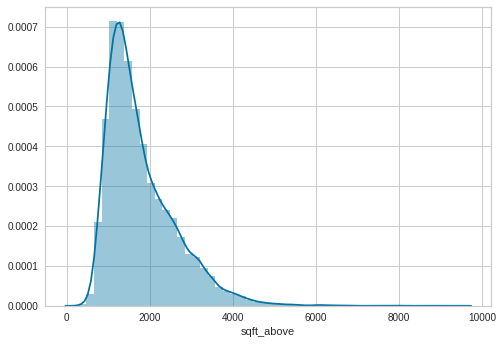

In [243]:
sns.distplot(data['sqft_above'])
data['sqft_above'].skew()

sqft above-positive skew

1.5779650555996247

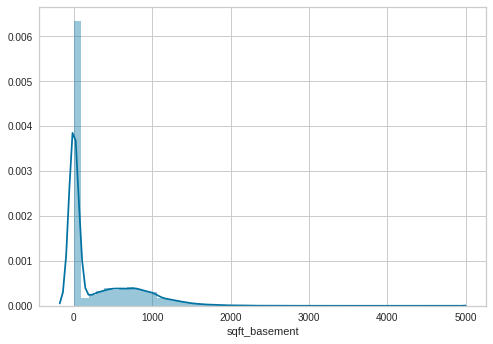

In [244]:
sns.distplot(data['sqft_basement'])
data['sqft_basement'].skew()

sqft_basement- positive skew

-0.46980539881436767

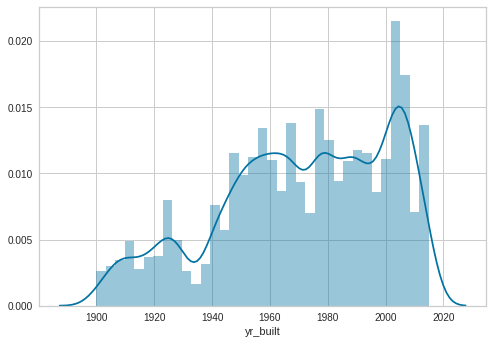

In [245]:
sns.distplot(data['yr_built'])
data['yr_built'].skew()

after 2000 more houses were built

4.549493366993928

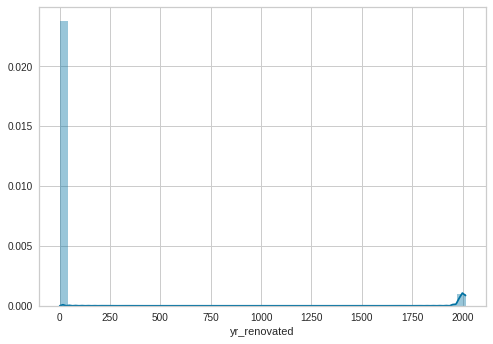

In [246]:
sns.distplot(data['yr_renovated'])
data['yr_renovated'].skew()

mostly buildings were not renovated only few renovated after 2000

0.4056612082396646

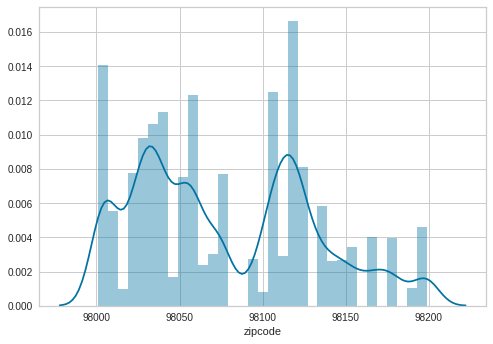

In [247]:
sns.distplot(data['zipcode'])
data['zipcode'].skew()

more houses in the region 98000 - 98050

-0.4852704765380861

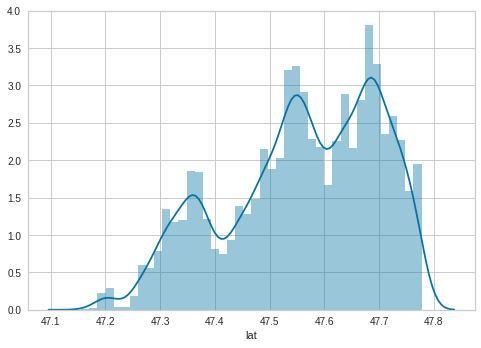

In [248]:
sns.distplot(data['lat'])
data['lat'].skew()

More houses are located between lat 47.5-47.8

0.8850529834328087

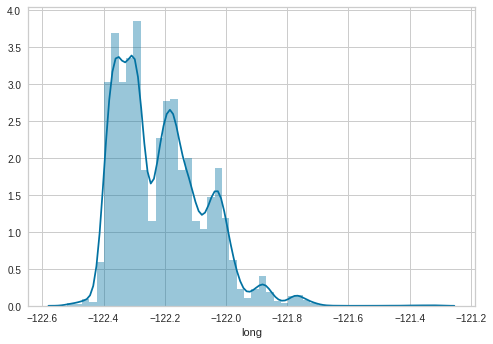

In [249]:
sns.distplot(data['long'])
data['long'].skew()

more houses are located btw -122.4 to -122.0

1.1081812758966967

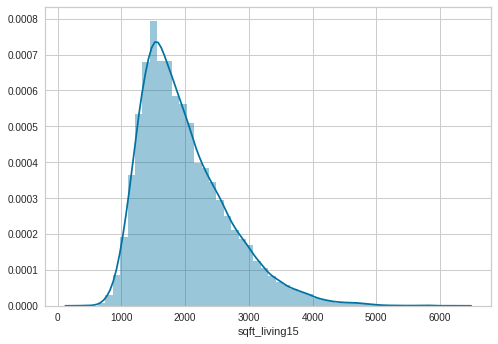

In [250]:
sns.distplot(data['sqft_living15'])
data['sqft_living15'].skew()

most houses with 2000 sqft

9.506743246764398

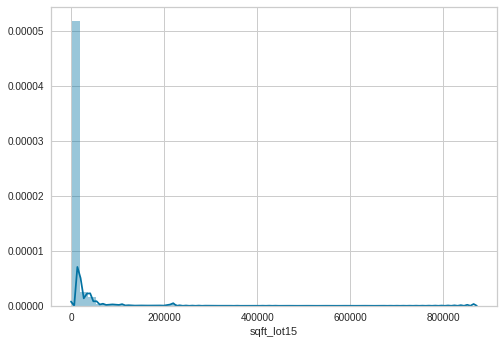

In [251]:
sns.distplot(data['sqft_lot15'])
data['sqft_lot15'].skew()

mostly houses with 0 lot15

3.Bivariate Analysis(target vs features)
target=Price

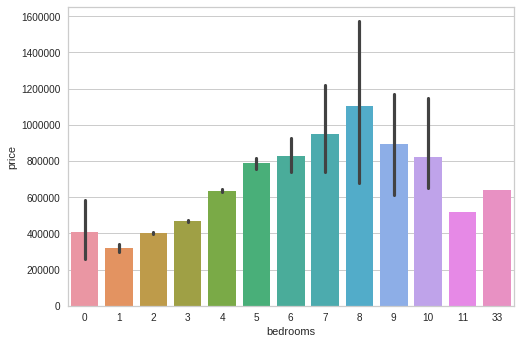

In [252]:
sns.barplot(x='bedrooms', y='price', data=data)

houses with 8 bedrooms are high and houses with 33 bedrooms may be a hotel

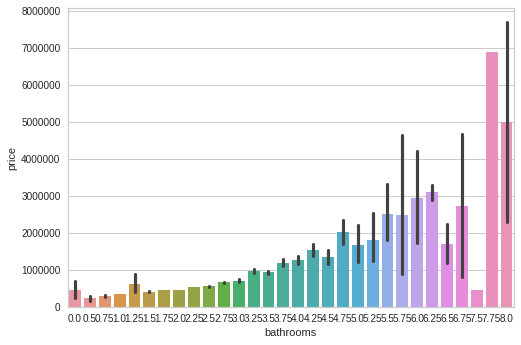

In [253]:
sns.barplot(x='bathrooms', y='price', data=data)

bathrooms has decimal values. 7.8 is the high value so high price

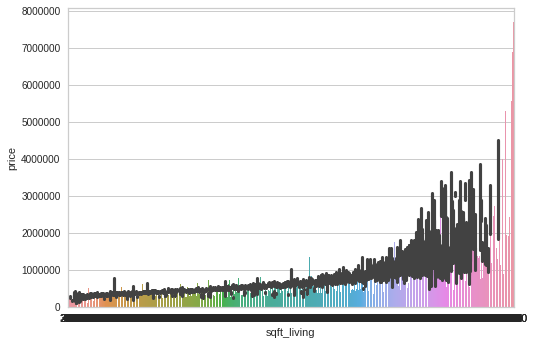

In [254]:
sns.barplot(x='sqft_living', y='price', data=data)

houses with more sqft has more price(good predictor)

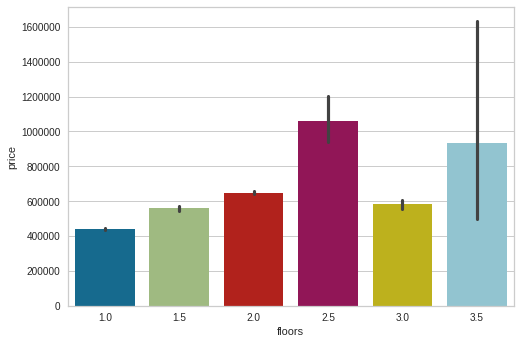

In [255]:
sns.barplot(x='floors', y='price', data=data)

2.5 floors has high impact on price(good predictor)

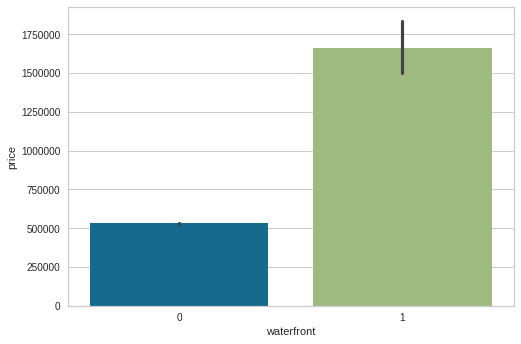

In [256]:
sns.barplot(x='waterfront', y='price', data=data)

houses with water front have high price

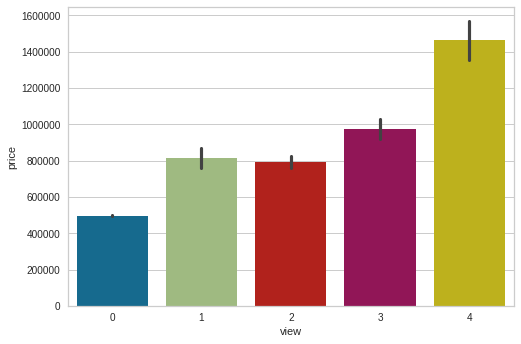

In [257]:
sns.barplot(x='view', y='price', data=data)

Houses with view has high price

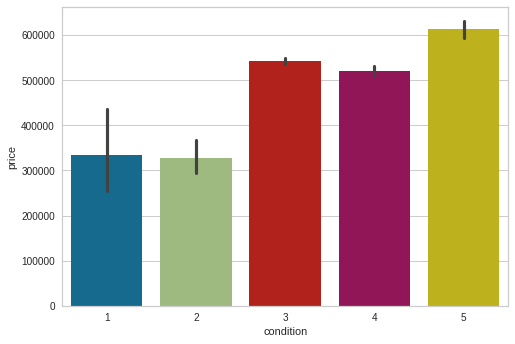

In [258]:
sns.barplot(x='condition', y='price', data=data)

houses with good condition has high price

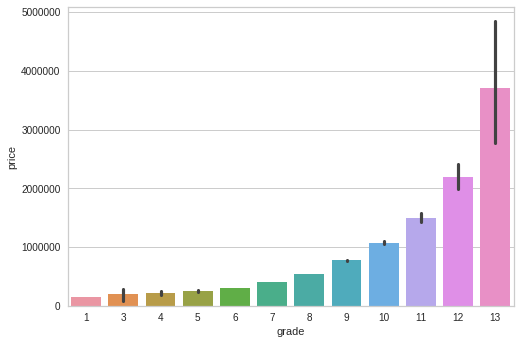

In [259]:
sns.barplot(x='grade', y='price', data=data)

High grade houses has high price

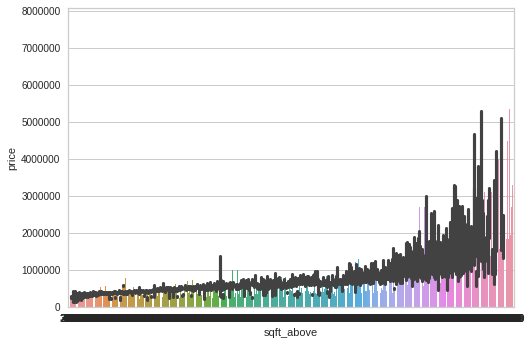

In [260]:
sns.barplot(x='sqft_above', y='price', data=data)

More sqft high price

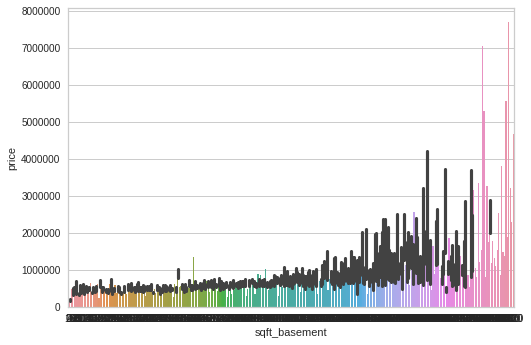

In [261]:
sns.barplot(x='sqft_basement', y='price', data=data)

More sqft high price

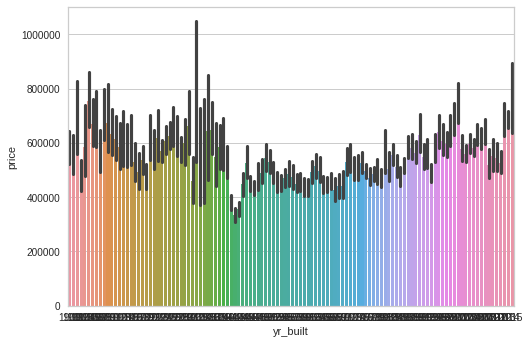

In [262]:
sns.barplot(x='yr_built', y='price', data=data)

price varies with yr built

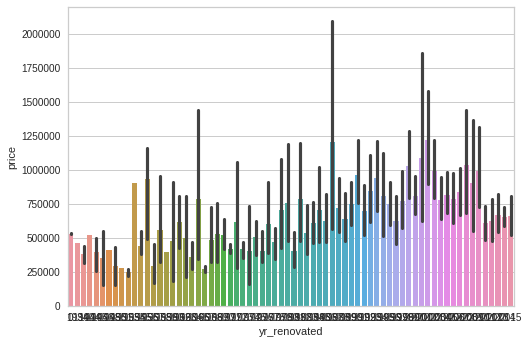

In [263]:
sns.barplot(x='yr_renovated', y='price', data=data)

houses renovated after 2000 has high price

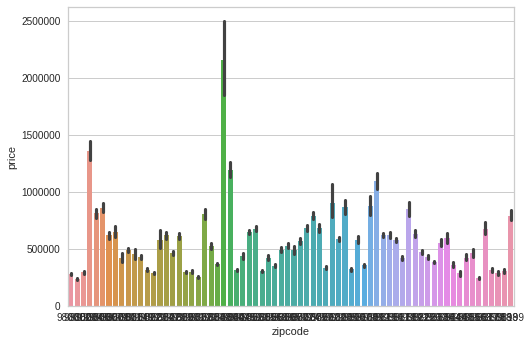

In [264]:
sns.barplot(x='zipcode', y='price', data=data)

Price varies with zipcode

KeyboardInterrupt: 

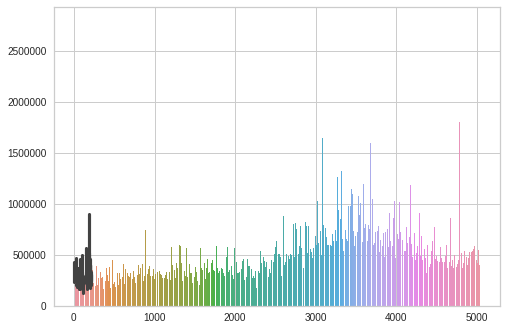

In [265]:
sns.barplot(x='lat', y='price', data=data)

price is high in particular area

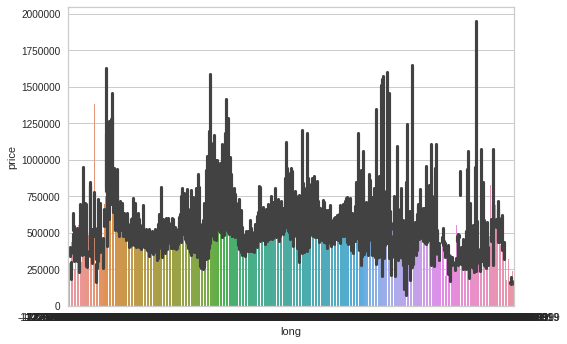

In [266]:
sns.barplot(x='long', y='price', data=data)

Price varies with long

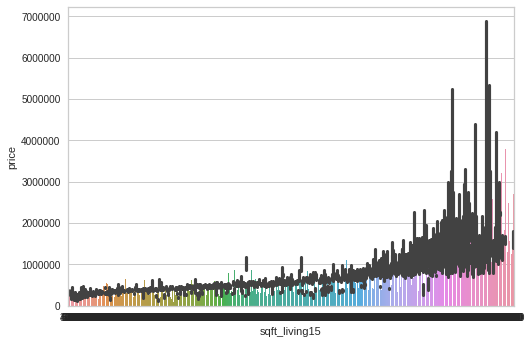

In [267]:
sns.barplot(x='sqft_living15', y='price', data=data)

more sqft high price

KeyboardInterrupt: 

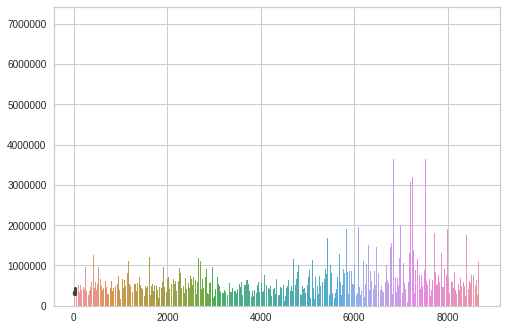

In [268]:
sns.barplot(x='sqft_lot15', y='price', data=data)

4.Bivariate Analysis Feature vs Feature (Selected Feature)

In [269]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

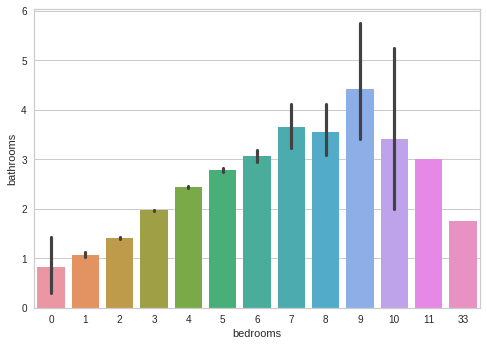

In [270]:
sns.barplot(x='bedrooms', y='bathrooms', data=data)

bedrooms and bathrooms has some relation

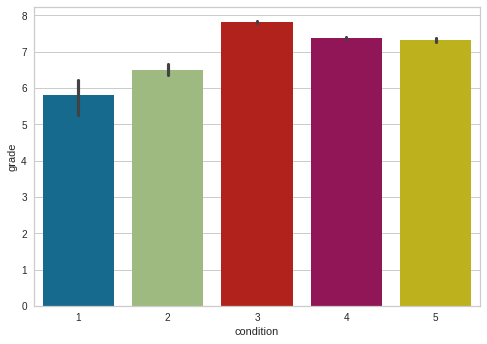

In [271]:
sns.barplot(x='condition', y='grade', data=data)

good condition house has good grade

In [272]:
sns.barplot(x='lat', y='zipcode', data=data)

KeyboardInterrupt: 

doesnt give any relation

In [ ]:
sns.barplot(x='long', y='zipcode', data=data)

doesnt give any relation

From the above analysis Id and Date to be doesnt give any relation so we drop both colums


4.Feature Engineering

In [273]:
data.drop('id',axis=1,inplace=True)

In [274]:
data.drop('date',axis=1,inplace=True)

In [275]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


 Next need to find correlation for the features

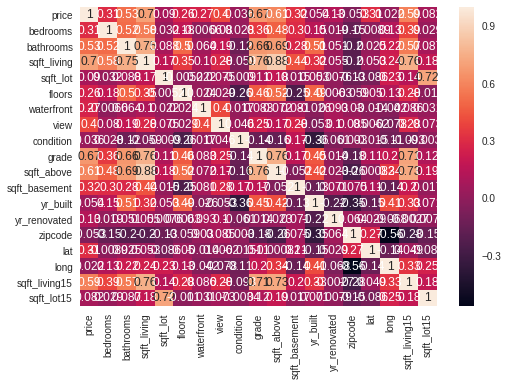

In [276]:
corr = data.corr()
sns.heatmap(corr, annot=True)

We observe that the columns sqft_living15 and sqft_lot15 have a strong correlation with sqft_living and sqft_lot respectively.

Now From the Above Analysis We got clean Data and Important feature for prediction

5.Model application

In [277]:
targets=data['price']
data.drop(columns=['price'],inplace=True)

In [278]:
from sklearn.model_selection import train_test_split
x_data, x_test, y_data, y_test = train_test_split(data,targets,test_size = 0.2)
print(x_data.shape,x_test.shape)

(17290, 18) (4323, 18)


Linear Regression

In [279]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_data, y_data)
lr.score(x_data, y_data)

0.6999388436569143

In [280]:
from sklearn.metrics import r2_score
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.6981879894730916

score from r2 scoring

In [281]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

123965.59969325997
37505462234.948074
352.0874886917454


root mean square error

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


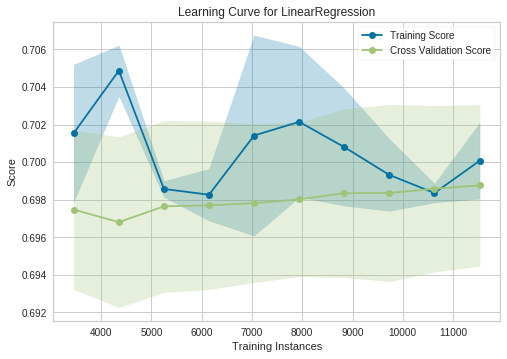

In [282]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
viz = LearningCurve(lr, train_sizes=sizes, scoring='r2')
viz.fit(x_data, y_data)
viz.poof()

Linear regression gives 70% efficiency

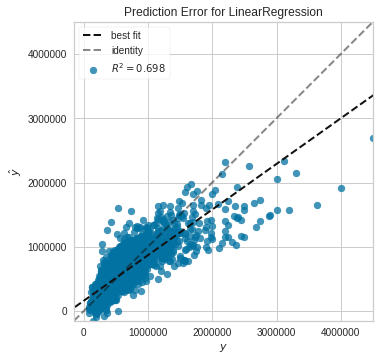

In [283]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lr)

visualizer.fit(x_data, y_data)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

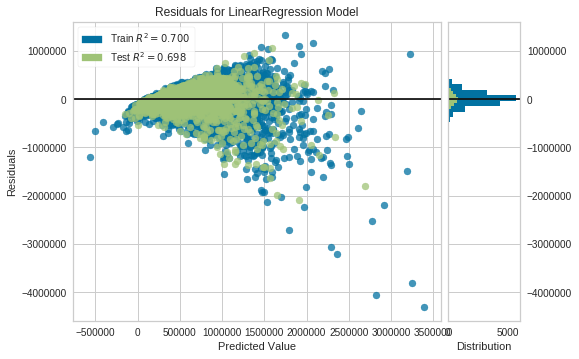

In [284]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lr)

visualizer.fit(x_data, y_data)  # Fit the training data to the model
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

let us try with polynomials

In [285]:
#Try different degree of polynomial features
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
polyDf = polynomial_features.fit_transform(x_data)
#polyDf = pd.DataFrame(x_poly, columns=X_train.columns)
lrPoly2 = LinearRegression()
lrPoly2.fit(polyDf, y_data)
lrPoly2.score(polyDf, y_data)
#polyDf

0.8318722464567586

In [286]:
polyDfTest = polynomial_features.fit_transform(x_test)
y_pred = lrPoly2.predict(polyDfTest)
r2_score(y_test, y_pred)

0.8126286681974034

it gives 82% result

In [287]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
polyDf = polynomial_features.fit_transform(x_data)
#polyDf = pd.DataFrame(x_poly, columns=X_train.columns)
lrPoly3 = LinearRegression()
lrPoly3.fit(polyDf, y_data)
lrPoly3.score(polyDf, y_data)
#polyDf

0.8729211540013619

In [288]:
polyDfTest = polynomial_features.fit_transform(x_test)
y_pred = lrPoly3.predict(polyDfTest)
r2_score(y_test, y_pred)

0.7162833486085354

polynomial 3 doesnt works

/opt/conda/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


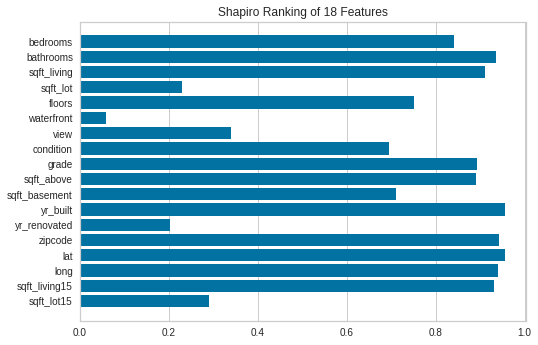

In [289]:
from yellowbrick.features import Rank1D
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=x_data.columns, algorithm='shapiro')
visualizer.fit(x_data, y_data)                # Fit the data to the visualizer
visualizer.transform(x_data)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

As we have high bias problem, possible actions to try out are
<ul>
<li>Train longer</li>
<li>Add polynomial features</li>
<li>Add more features</li>
<li>Decrease regularization</li>
<li>Choose different hyperparameters</li>
<li>A different model</li>
</ul>

In [290]:
data['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [291]:
data['yr_built'] = pd.cut(data['yr_built'], 3, labels=['old', 'medium', 'new'])
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,medium,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,medium,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,old,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,medium,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,new,0,98074,47.6168,-122.045,1800,7503


splitting yr built into old medium new

In [292]:
data['yr_renovated'] = pd.cut(data['yr_renovated'], 3, labels=['old', 'medium', 'new'])
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,medium,old,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,medium,new,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,old,old,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,medium,old,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,new,old,98074,47.6168,-122.045,1800,7503


splitting yr renovated into old medium new

In [293]:
categorical_columns.append('yr_built')
numeric_columns.remove('yr_built')

In [294]:
categorical_columns.append('yr_renovated')
numeric_columns.remove('yr_renovated')

In [295]:
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [296]:
data.dtypes

bedrooms         category
bathrooms        category
sqft_living         int64
sqft_lot            int64
floors           category
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
yr_built         category
yr_renovated     category
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [297]:
categorical_columns

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'yr_renovated']

Creating more columns

In [298]:
data=pd.get_dummies(data, columns=['floors','waterfront','view','yr_built','yr_renovated'])
data.head()
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,zipcode,lat,...,view_1,view_2,view_3,view_4,yr_built_old,yr_built_medium,yr_built_new,yr_renovated_old,yr_renovated_medium,yr_renovated_new
0,3,1.00,1180,5650,3,7,1180,0,98178,47.5112,...,0,0,0,0,0,1,0,1,0,0
1,3,2.25,2570,7242,3,7,2170,400,98125,47.7210,...,0,0,0,0,0,1,0,0,0,1
2,2,1.00,770,10000,3,6,770,0,98028,47.7379,...,0,0,0,0,1,0,0,1,0,0
3,4,3.00,1960,5000,5,7,1050,910,98136,47.5208,...,0,0,0,0,0,1,0,1,0,0
4,3,2.00,1680,8080,3,8,1680,0,98074,47.6168,...,0,0,0,0,0,0,1,1,0,0


In [299]:
from sklearn.model_selection import train_test_split
x_data, x_test, y_data, y_test = train_test_split(data,targets,test_size = 0.2)
print(x_data.shape,x_test.shape)

(17290, 32) (4323, 32)


In [300]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_data, y_data)
lr.score(x_data, y_data)

0.6977807595985985

In [301]:
from sklearn.metrics import r2_score
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.7207739566763207

It gives 72% efficiency

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


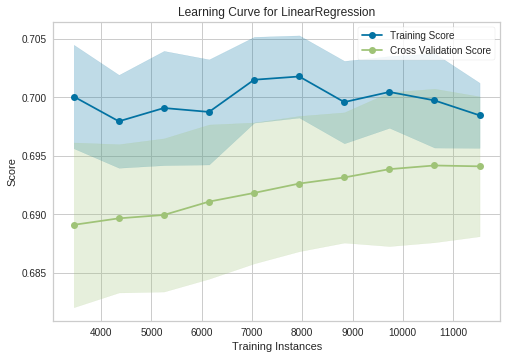

In [302]:
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
viz = LearningCurve(lr, train_sizes=sizes, scoring='r2')
viz.fit(x_data, y_data)
viz.poof()

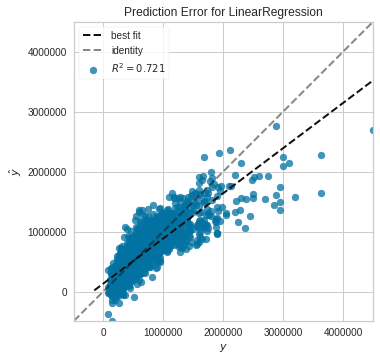

In [303]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lr)

visualizer.fit(x_data, y_data)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [304]:
#Try different degree of polynomial features
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
polyDf = polynomial_features.fit_transform(x_data)
#polyDf = pd.DataFrame(x_poly, columns=X_train.columns)
lrPoly2 = LinearRegression()
lrPoly2.fit(polyDf, y_data)
lrPoly2.score(polyDf, y_data)
#polyDf

0.8387535199277559

In [305]:
polyDfTest = polynomial_features.fit_transform(x_test)
y_pred = lrPoly2.predict(polyDfTest)
r2_score(y_test, y_pred)

0.8017997649512185

polynomial factor gives 81% efficiency

/opt/conda/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/conda/lib/python3.6/site-packages/scipy/stats/morestats.py:1650: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


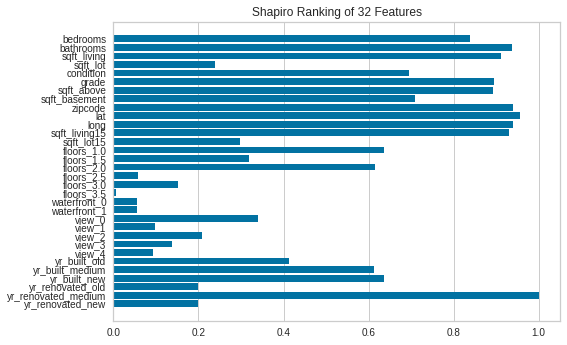

In [306]:
from yellowbrick.features import Rank1D
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=x_data.columns, algorithm='shapiro')
visualizer.fit(x_data, y_data)                # Fit the data to the visualizer
visualizer.transform(x_data)             # Transform the data
visualizer.poof()  

Let us try with other model

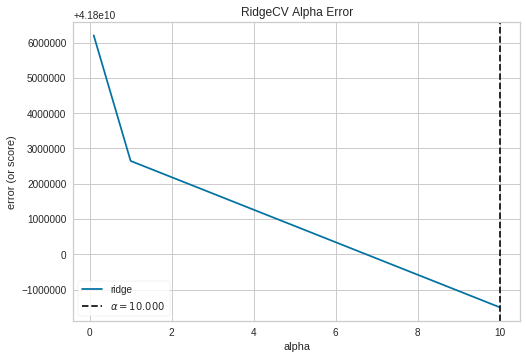

In [307]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection
model = RidgeCV()
visualizer = AlphaSelection(model)
visualizer.fit(x_data, y_data)
g = visualizer.poof()

In [308]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10.000)
ridge.fit(x_data, y_data)
ridge.score(x_data, y_data)

0.6976638756708705

In [309]:
y_pred = ridge.predict(x_test)
r2_score(y_test, y_pred)

0.7207950585030027

ridge gives 70% efficency

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


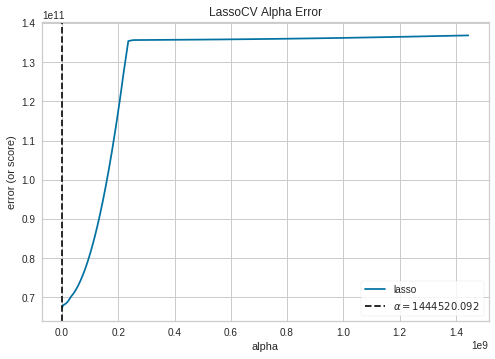

In [310]:
from sklearn.linear_model import LassoCV
model = LassoCV()
visualizer = AlphaSelection(model)
visualizer.fit(x_data, y_data)
g = visualizer.poof()

In [311]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha = 1444520.092)
lasso.fit(x_data, y_data)
lasso.score(x_data, y_data)

0.507713471154704

In [312]:
y_pred = lasso.predict(x_test)
r2_score(y_test, y_pred)

0.5038446594252389

lasso gives 50% efficency

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


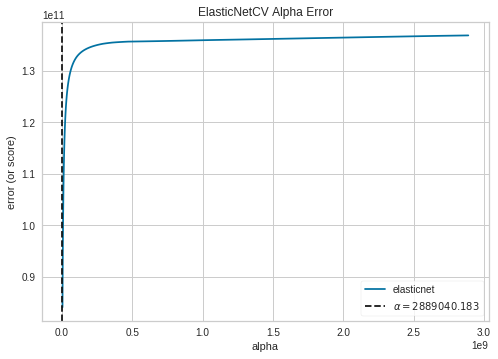

In [313]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV()
visualizer = AlphaSelection(model)
visualizer.fit(x_data, y_data)
g = visualizer.poof()

In [314]:
from sklearn.linear_model import ElasticNet
elasticnet  = ElasticNet(alpha = 2889040.183)
elasticnet.fit(x_data, y_data)
elasticnet.score(x_data, y_data)

0.38604398362262404

In [315]:
y_pred = elasticnet.predict(x_test)
r2_score(y_test, y_pred)

0.3930383613189238

elasticnet gives 39% of efficency

SVR model

In [317]:
cvFolds = 5
scoring = 'r2'

In [318]:
params_random = {'C': stats.expon(scale=100), 'gamma': stats.expon(scale=.1),
  'kernel': ['linear', 'rbf']}

In [319]:
from sklearn.svm import SVR
svr = SVR()

In [320]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator=svr, param_distributions=params_random, cv = cvFolds, n_jobs=-1, scoring=scoring, n_iter=2)
random_result = random.fit(x_data, y_data)
# Summarize results
print("Best score : %f obtained using %s" % (random_result.best_score_, random_result.best_params_))

KeyboardInterrupt: 

In [ ]:
svr = SVR(C=random_result.best_params_['C'], gamma=random_result.best_params_['gamma'], kernel=random_result.best_params_['kernel'])

In [ ]:
svr.fit(x_data, y_data)
svr.score(x_data, y_data)

In [ ]:
y_pred = svr.predict(x_test)
r2_score(y_test, y_pred)

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(svr)

visualizer.fit(x_data, y_data)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

SVR doesnt work

Summary:</li>
Models</li>
LinearRegression=83%;</li>
RidgeCV=72%;</li>
LassoCV=50%;</li>
ElasticityCV=39%;</li>
SVR=nil</li>

Conclusion: linear regression fits best for this Data. To get more efficiency we need to add more data.